In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Количество изюма в булочка в среднем 15

$\mu=15.0$    
$\sigma = 2.0$

In [3]:
m = 15.0
s = 2.0

norm = sts.norm(loc=m, scale=s)
norm.rvs(size=1000)

array([ 12.65953015,  16.07532189,  17.90390716,  15.04342658,
        16.05332029,  15.16239608,  13.29864634,  13.92844993,
        13.10035132,  16.50167519,  14.91681203,  14.96324136,
        15.24785688,  14.29922363,  13.99869612,  16.58134934,
        16.10579248,  15.56107885,  13.90914287,  16.20048922,
        13.72676638,  14.23929968,  14.91422896,  16.97274753,
        13.69285895,  15.29318602,  17.64378759,  17.68950481,
        14.07012399,  15.3069273 ,  12.78855938,  18.79186642,
        17.94115098,  10.61760255,  14.84400825,  12.78581385,
        16.54529431,  17.72788935,  13.80285704,  17.14232758,
        15.5193884 ,  11.66368365,  14.3451936 ,  12.94155194,
         9.223973  ,  13.79231088,  16.29744532,  13.66571506,
        15.47501717,  16.94890033,  15.22967098,  14.3240464 ,
        14.08193643,  14.04497653,  16.18387073,  13.04585238,
        14.08072369,  16.88905371,  15.61957791,  14.29568153,
        14.09471055,  13.85948775,  14.76263037,  18.63

Text(0.5,0,u'$x$')

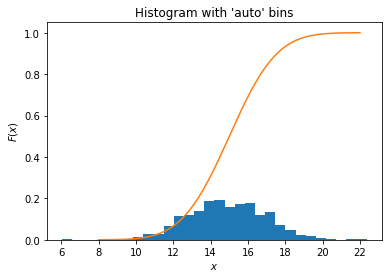

In [18]:
b = norm.rvs(size=1000)

a = np.hstack(b)
plt.hist(a, bins='auto', normed=True)
plt.title("Histogram with 'auto' bins")

x = np.linspace(8,22,1000)
cdf = norm.cdf(x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

In [10]:
# norm.pdf(5)
# norm.pdf(10)
norm.pdf(50)


6.2883619143909686e-68

In [27]:
def clt(sample,n,n_sub_samples=1000):
    means = []
    for i in range(n_sub_samples):
        sub_sample = sample[np.random.randint(0,len(sample),n)]
        means.append(np.mean(sub_sample))
        
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    SE = s/np.sqrt(n)
    
    norm_rv = sts.norm(m,SE)
    
    print 'Теоретическое среднее vs приближенное: {:.2f} vs {:.2f}'.format(m,mu)
    print 'Теоретическое стандартное откл. vs приближенное: {:.2f} vs {:.2f}'.format(SE,sigma)
    print 'Приближенное среднее 95% доверительный интервал = {:.2f} +/- {:.2f}'.format(mu,2*SE)
    
    plt.hist(means,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Теоретическое среднее vs приближенное: 15.00 vs 14.92
Теоретическое стандартное откл. vs приближенное: 0.89 vs 0.94
Приближенное среднее 95% доверительный интервал = 14.92 +/- 1.79


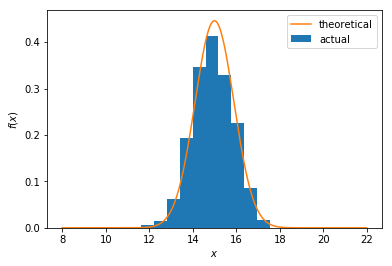

In [28]:
clt(b, 5)

Теоретическое среднее vs приближенное: 15.00 vs 14.87
Теоретическое стандартное откл. vs приближенное: 0.28 vs 0.28
Приближенное среднее 95% доверительный интервал = 14.87 +/- 0.57


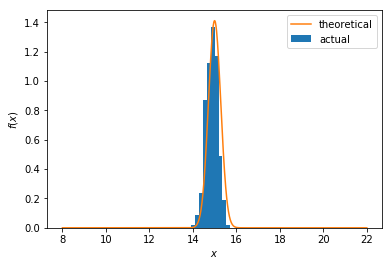

In [29]:
clt(b, 50)

Теоретическое среднее vs приближенное: 15.00 vs 14.88
Теоретическое стандартное откл. vs приближенное: 0.09 vs 0.09
Приближенное среднее 95% доверительный интервал = 14.88 +/- 0.18


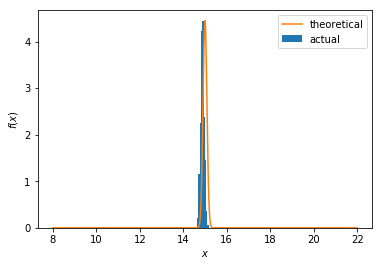

In [30]:
clt(b, 500)